# Linear Regression: Gradient descent - many (numeric) variables

Contents
 - load data
 - data manipulation
   - variables to use
 - multiple regression (with Gradient Descent)

Sources:


Copyright (C) 2018 Alan Chalk  
Please do not distribute or publish without permission.

## Start_.

**Import packages**

In [60]:
import os
import numpy as np
import pandas as pd
import pickle

from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Functions**

In [61]:
def fn_MAE(actuals, predictions):
    return np.round(np.mean(np.abs(predictions - actuals)))

**Settings**

In [62]:
font = {'size'   : 22}
plt.rc('font', **font)

**Directories and paths**

In [63]:
# Set directories
print(os.getcwd())
dirRawData = "../input/"
dirPData   = "../PData/"
dirPOutput = "../POutput/"

/home/jovyan/Projects/AmesHousing/PCode


**Load data**

In [64]:
#store = pd.HDFStore(dirPData + '02_df_all.h5')
#df_all = pd.read_hdf(store, 'df_all')
#store.close()
f_name = dirPData + '02_df.pickle'

with (open(f_name, "rb")) as f:
    dict_ = pickle.load(f)

df_all = dict_['df_all']

del f_name, dict_

In [65]:
# load the variables information
f_name = dirPData + '02_vars.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
var_dep = dict_['var_dep']
vars_ind_numeric = dict_['vars_ind_numeric']

del dict_

**Take a small subset of numeric variables for the linear model**

In [66]:
vars_toUse = vars_ind_numeric
vars_toUse = [var for var in vars_toUse if var not in ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
                                                      'bsmt_full_bath', 'bsmt_half_bath',
                                                      'garage_cars',
                                                      'bedroom_abvgr', 'kitchen_abvgr',
                                                      'full_bath', 'half_bath',
                                                      'x1st_flr_sf', 'x2nd_flr_sf', 'low_qual_fin_sf',
                                                       'total_bsmt_sf',
                                                      'totrms_abvgrd', 'lot_area', 'overall_qual']]


In [67]:
X = df_all[vars_toUse].values
y = df_all[var_dep].values

**TODO**

Use StandardScaler from sklearn.preprocessing to scale the columns (features) in X
 - instantiate a StandardScaler() and call it standardScaler_
 - use the .fit method to fit it to X
 - use its .transform method to scale X (overwrite X with the result

In [68]:
from sklearn.preprocessing import StandardScaler

standardScaler_ = StandardScaler()
standardScaler_.fit(X)
X = standardScaler_.transform(X)

## Multiple linear regression with Gradient Descent

**TODO**

In the functions below, do the following:
 - fn_predict
  - this function should return the dot (matrix) product of the matrix X with the coefficients, i.e. X.dot(coef)
 - fn_error
  - this function should return the errors i.e. y - y_hat
 - fn_gradient
  - this function should return an array of the gradients i.e. -2 * X.T.dot(error)
 - fn_loss
  - this function should return the sum of squared errors (a scalar) e.g. error.T.dot(error).ravel()[0]

In [69]:
###Note that np.array.T returns the transpose of np.array

In [81]:
def fn_predict(X, coef):
    """
    X: N (examples) times D (features)
    coef: D (features) times 1 
    """
    return X.dot(coef)

def fn_error(y, y_hat):
    """
    y, y_hat: N (examples) times 1 
    """    
    return y - y_hat

def fn_gradient(X, coef, y):
    """
    coef: D (features) times 1 
    """    
    y_hat = fn_predict(X, coef)
    error = fn_error(y, y_hat)
    return -2 * X.T.dot(error)

def fn_loss(X, coef, y):
    """
    X: N (examples) times D (features)
    coef: D (features) times 1 
    y: N (examples) times 1
    """
    y_hat = fn_predict(X, coef)
    error = fn_error(y, y_hat)
    return error.T.dot(error).ravel()[0] #note E' dot E gives square of each term (matrix mult), ravel squeezes result into a scalar
   

**TODO**

 - In the for loop below calculate:
  - g
  - g_mag
  - beta
  - loss_this

In [82]:
# X1.shape

In [87]:
eta = 1e-5
# eta = 0.00019 #gives quite a zig-zag. completes in 90 iterations
# eta = 0.0001 #gives smooth - but still detour and takes more iterations
# eta = 0.0002 #gives more zig-zag - but still finishes quicker
# eta = 0.003 #diverges
grad_mag = 1e10
tol = 1
n_iter = 100000
store_every = 1 # how often results are stored to path
print_every = 100 # how often results are printed

# Add column for intercept
### NEED A COLUMN OF ONES TO MULTIPPLY THE INTERCEPT
X1 = np.insert(X, 0, 1, axis=1)
n_dim = X1.shape[1]

# Initialise lists to score the path of beta and the path of the loss function
beta_path = np.full((1+int(n_iter/store_every), n_dim), np.nan)
loss_path = []

# initialise
beta = np.zeros([n_dim, 1]) #start with 0 for every single coefficient
beta[0] = np.mean(y)

beta_path[0,:] = beta.T
loss_this = fn_loss(X1, beta, y)
loss_path.append(loss_this)
g = fn_gradient(X1, beta, y)
g_mag = g.T.dot(g)

for i in range(n_iter):
    if g_mag < tol:
        break
    # calculate the gradient using fn_gradient
    g = fn_gradient(X1,beta,y)
    
    # calculate the magnitude of the gradient in the same manner as above
    g_mag = g.T.dot(g)
    
    # take a step size eta in the correct direction
    beta += -eta*g
    
    # calculate the loss using fn_loss
    loss_this = fn_loss(X1, beta, y)
    
    loss_path.append(loss_this)
    if (i + 1) % store_every == 0:
        beta_path[int((i + 1)/store_every),:] = beta.T
    if i % print_every == 0:
        print(i, g_mag)

beta_path = beta_path[0:i]
loss_path = loss_path[0:i]

0 [[4.27830572e+17]]
100 [[4.41704039e+13]]
200 [[3.14372069e+12]]
300 [[2.4287671e+11]]
400 [[1.88313167e+10]]
500 [[1.46032955e+09]]
600 [[1.13246504e+08]]
700 [[8782111.01337891]]
800 [[681040.67370162]]
900 [[52813.77098098]]
1000 [[4095.63556431]]
1100 [[317.61092567]]
1200 [[24.63029211]]
1300 [[1.91004537]]


**TODO**

 - Run the cell below to check your results - the differences should be 0 or close to 0

In [88]:
# are the results correct:
# The values in coef_skl below are copied from 04b.
coef_skl = [180420.68685832,
            6632.12872603,  23144.71258818, 8496.07537172, 34099.67335803, 
            10285.13439506, 16719.954712, 4586.49886457, 3025.28130609, 
            2567.18846942, 958.18770425, 4432.03659486, -1646.13700319,
            -368.45242442, -553.56153625, -1433.00401289]
#print(beta.T)
print(np.round(beta.T - np.array(coef_skl), 2))

[[-0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.]]


### Graph some of the coefficient paths

In [89]:
vars_names = vars_toUse.copy()
vars_names.insert(0, 'intercept')

['intercept', 'overall_cond', 'year_built', 'year_remod_add', 'gr_liv_area', 'fireplaces', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'x3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold']


Text(0, 0.5, 'year_remod_add')

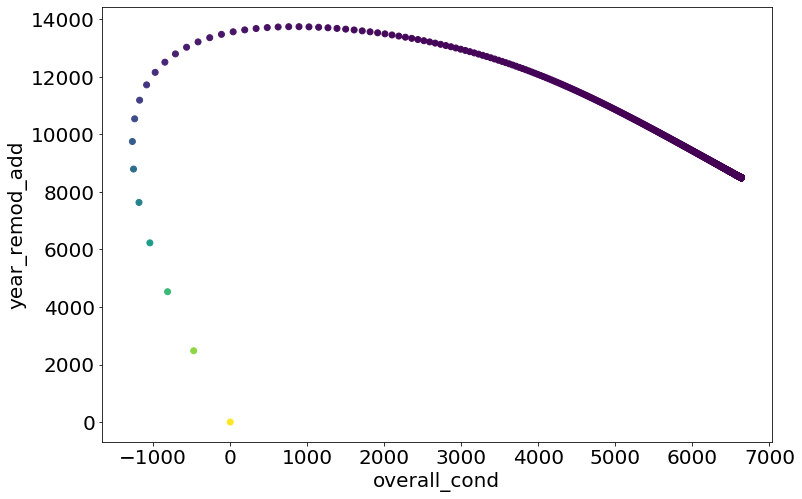

In [90]:
print(vars_names)
idx_x = 1
idx_y = 3

var_x = vars_names[idx_x]
var_y = vars_names[idx_y]

font = {'size'   : 20}
plt.rc('font', **font)

# The next 4 lines are not important and just set the colour
cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))
colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(beta_path[:,idx_x], 
            beta_path[:,idx_y], 
            color=colours)

ax1.set_xlabel(var_x)
ax1.set_ylabel(var_y)

In [57]:
#fig.savefig(dirPOutput + '04a_vars24_eta1e5.pdf', bbox_inches='tight')
#fig.savefig(dirPOutput + '04a_vars13_eta1e5.pdf', bbox_inches='tight')

TODO

 - Inspect the paths for various values of eta
 - As eta increases convergence will be quicker - but too big and gradient descent will diverge


In [58]:
# based on previous versions of the data
# eta = 0.00019 gives quite a zig-zag. completes in 90 iterations
# eta = 0.0001 gives smooth - but still detour and takes more iterations
# eta = 0.0002 gives more zig-zag - but still finishes quicker
# eta = 0.003 diverges